In [1]:
import csv
import os
import matplotlib.pyplot as plt

In [8]:
plt.rcParams['font.size'] = '14'

# colors per toolchain
COLS = {
    'gobff-2020b (failing tests!)': 'b',
    'gobff-2021.03-amd (failing tests!)': 'p',
    'goblf-2020b': 'g',
    'foss-2020b': 'r',
    'intel-2020b': 'k',
}

# function to populate plot using values in all_data
def populate_plot(all_data, skip_cols=0):
    
    for key, data in all_data.items():
        core_counts = []
        avg_data = []
        for row in data:
            core_counts.append(int(row[0]))
            vals = [int(x) for x in row[1:]]
            avg_data.append(sum(vals) / len(vals))
        plt.plot(core_counts[::-1][skip_cols:], avg_data[::-1][skip_cols:], COLS[key] + 'o-', label=key)
        print(core_counts)

    plt.legend();

[96, 84, 72, 60, 48, 36, 24, 12, 6, 3, 1]
[96, 84, 72, 60, 48, 36, 24, 12, 6, 3, 1]
[96, 84, 72, 60, 48, 36, 24, 12, 6, 3, 1]
[96, 84, 72, 60, 48, 36, 24, 12, 6, 3, 1]
[36, 27, 18, 9, 3, 1]
[36, 27, 18, 9, 3, 1]
[36, 27, 18, 9, 3, 1]
[36, 27, 18, 9, 3, 1]
[]
[256, 224, 192, 160, 128, 64, 32, 16, 8, 4, 2, 1]
[]
[]


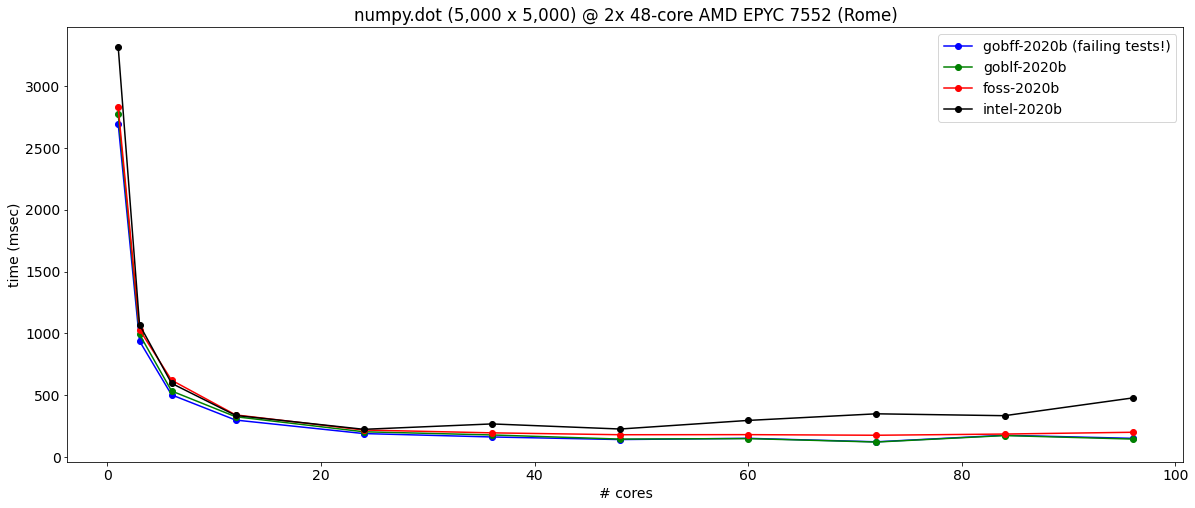

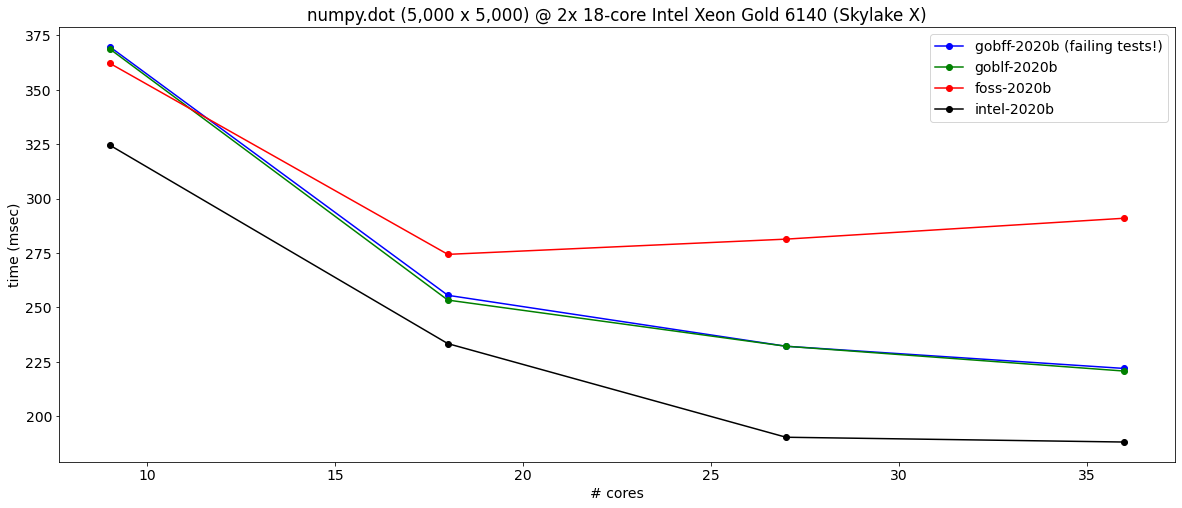

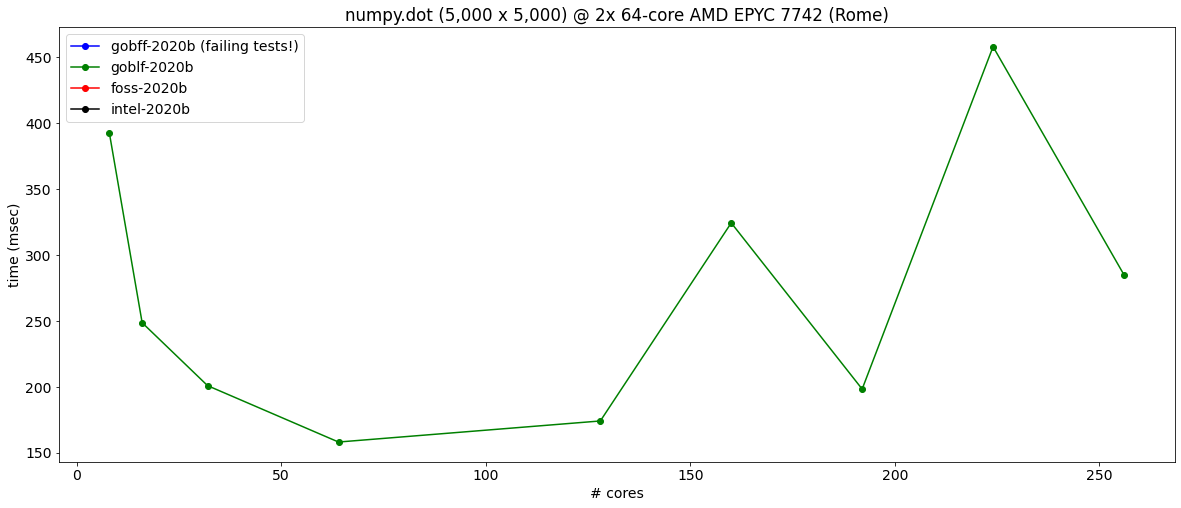

In [9]:
# read data from CSV files for numpy.dot

clusters = [
    ('doduo_node3507', "2x 48-core AMD EPYC 7552 (Rome)", 0),
    ('skitty_node3100', "2x 18-core Intel Xeon Gold 6140 (Skylake X)", 2),
    ('eiger', '2x 64-core AMD EPYC 7742 (Rome)', 3)
]

for cluster, plot_title_part, skip_cols in clusters:
    all_data_dot = {
        'gobff-2020b (failing tests!)': [],
        'goblf-2020b': [],
        'foss-2020b': [],
        'intel-2020b': [],
    }
    for key in all_data_dot:
        key_fn = key.replace(' (failing tests!)', '')
        fn = 'results_%s_SciPy-bundle-2020.11-%s_numpy_dot.csv' % (cluster, key_fn)
        if os.path.exists(fn):
            with open(fn) as fp:
                reader = csv.reader(fp)
                all_data_dot[key] = list(reader)[1:]

    # plot results for numpy.dot
    fig = plt.figure(figsize=(20.0, 8.0))
    plt.title("numpy.dot (5,000 x 5,000) @ %s" % plot_title_part)
    plt.xlabel('# cores')
    plt.ylabel('time (msec)')
    populate_plot(all_data_dot, skip_cols=skip_cols)

[1, 4, 8, 12, 18, 24, 48, 72, 96]
[1, 4, 8, 12, 18, 24, 48, 72, 96]
[1, 4, 8, 12, 18, 24]
[1, 4, 8, 12, 18, 24, 48, 72, 96]
[36, 27]
[36, 27, 18, 9, 3, 1]
[36, 27, 18, 9, 3, 1]
[36, 27, 18, 9, 3, 1]


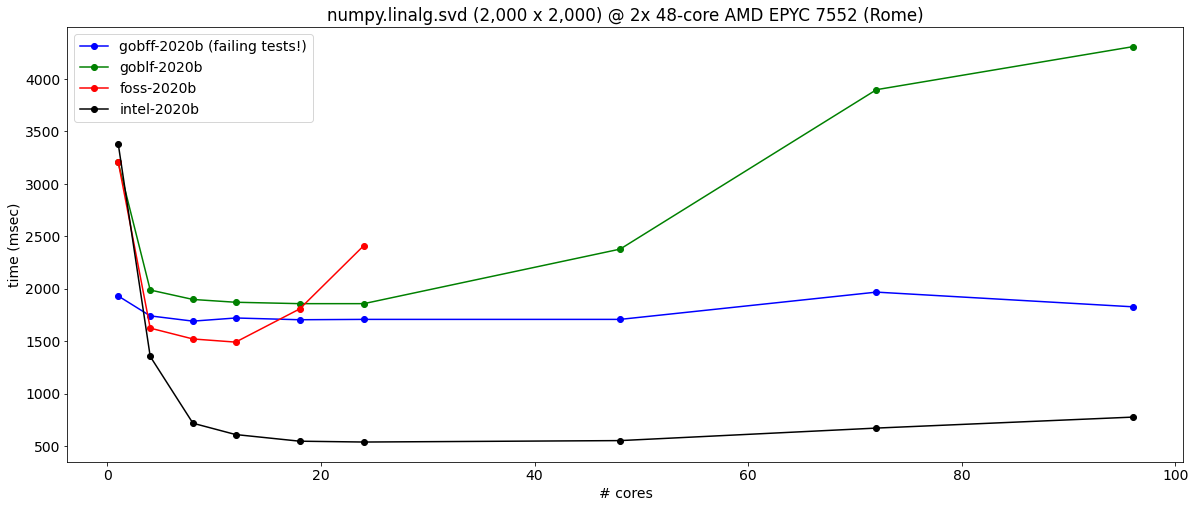

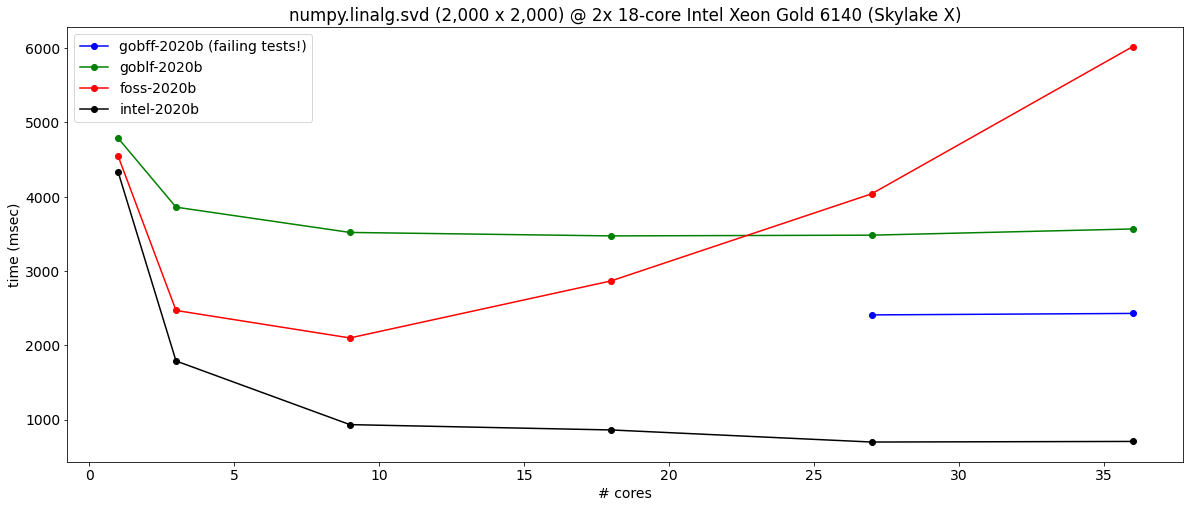

In [7]:
# read data from CSV files for numpy.linalg.svd

clusters = [
    ('doduo', "2x 48-core AMD EPYC 7552 (Rome)"),
    ('skitty', "2x 18-core Intel Xeon Gold 6140 (Skylake X)"),
]

for cluster, plot_title_part in clusters:
    all_data_svd = {
        'gobff-2020b (failing tests!)': None,
        'goblf-2020b': None,
        'foss-2020b': None,
        'intel-2020b': None,
    }
    for key in all_data_svd:
        key_fn = key.replace(' (failing tests!)', '')
        with open('results_%s_SciPy-bundle-2020.11-%s_numpy_svd.csv' % (cluster, key_fn)) as fp:
            reader = csv.reader(fp)
            all_data_svd[key] = list(reader)[1:]

    # plot results for numpy.linalg.svd
    fig = plt.figure(figsize=(20.0, 8.0))
    plt.title("numpy.linalg.svd (2,000 x 2,000) @ %s" % plot_title_part)
    plt.xlabel('# cores')
    plt.ylabel('time (msec)')
    populate_plot(all_data_svd)